In [71]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [72]:
data = pd.read_csv('customer_segmentation.csv')

In [73]:
data.head(10)

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [74]:
data.columns

Index(['index', 'InvoiceNo', 'StockCode', 'Description', 'Quantity',
       'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   index        541909 non-null  int64  
 1   InvoiceNo    541909 non-null  object 
 2   StockCode    541909 non-null  object 
 3   Description  540455 non-null  object 
 4   Quantity     541909 non-null  int64  
 5   InvoiceDate  541909 non-null  object 
 6   UnitPrice    541909 non-null  float64
 7   CustomerID   406829 non-null  float64
 8   Country      541909 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 37.2+ MB


In [76]:
data.duplicated().sum()


np.int64(0)

In [77]:
data['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [78]:
data['Description'].unique()

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ..., 'lost',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], shape=(4224,), dtype=object)

In [79]:
data['Description'].nunique()

4223

In [80]:
data['InvoiceNo'].nunique()

25900

In [81]:
541909 -25900

516009

In [82]:
data['StockCode'].nunique()

4070

In [83]:
for i in data.columns:
    print(f"{i}: {data[i].nunique()}")

index: 541909
InvoiceNo: 25900
StockCode: 4070
Description: 4223
Quantity: 722
InvoiceDate: 23260
UnitPrice: 1630
CustomerID: 4372
Country: 38


In [84]:
le_desc = LabelEncoder()

data['Description_encoded'] = le_desc.fit_transform(data['Description'])


In [85]:
data.head(5)

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Description_encoded
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,3918
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,3926
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,913
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1910
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2911


In [86]:
le_stock = LabelEncoder()

data['StockCode_encoded'] = le_stock.fit_transform(data['StockCode'])


In [87]:
data.head(5)

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Description_encoded,StockCode_encoded
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,3918,3536
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,3926,2794
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,913,3044
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1910,2985
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2911,2984


In [88]:
data['TotalPrice'] = data['UnitPrice'] * data['Quantity']


In [89]:
data.head(5)

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Description_encoded,StockCode_encoded,TotalPrice
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,3918,3536,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,3926,2794,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,913,3044,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1910,2985,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2911,2984,20.34


In [90]:
data = data.drop(columns=['index'])


In [91]:
data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Description_encoded,StockCode_encoded,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,3918,3536,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,3926,2794,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,913,3044,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1910,2985,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2911,2984,20.34


In [92]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])


In [93]:
data['Time'] = data['InvoiceDate'].dt.time


In [94]:
data['InvoiceDate'] = data['InvoiceDate'].dt.date


In [95]:
data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Description_encoded,StockCode_encoded,TotalPrice,Time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,3918,3536,15.30,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,3926,2794,20.34,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,913,3044,22.00,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,1910,2985,20.34,08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,2911,2984,20.34,08:26:00


In [96]:
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Description_encoded,StockCode_encoded,TotalPrice,Time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,3918,3536,15.30,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,3926,2794,20.34,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,913,3044,22.00,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,1910,2985,20.34,08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,2911,2984,20.34,08:26:00
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01,7.65,17850.0,United Kingdom,3158,1662,15.30,08:26:00
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01,4.25,17850.0,United Kingdom,1529,800,25.50,08:26:00
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01,1.85,17850.0,United Kingdom,1653,1547,11.10,08:28:00
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01,1.85,17850.0,United Kingdom,1650,1546,11.10,08:28:00
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01,1.69,13047.0,United Kingdom,244,3305,54.08,08:34:00


In [97]:
data['Country'] = data['Country'].replace('EIRE', 'Ireland')


In [98]:
data['Country'].unique()


array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'Ireland', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [99]:
data.head(5)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Description_encoded,StockCode_encoded,TotalPrice,Time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,3918,3536,15.30,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,3926,2794,20.34,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,913,3044,22.00,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,1910,2985,20.34,08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,2911,2984,20.34,08:26:00


In [100]:
data['StockCode'] = data['StockCode'].str.upper()
data[data['Description']  == 'WHITE HANGING HEART T-LIGHT HOLDER']['StockCode'].unique()


array(['85123A'], dtype=object)

In [101]:
data[data['Description']  == 'RED WOOLLY HOTTIE WHITE HEART.']['StockCode'].unique()


array(['84029E'], dtype=object)

In [102]:
((data.groupby('StockCode')['Description'].nunique()) > 1 ).sum()


np.int64(645)

In [103]:
#

def calculate_rfm(data):
    """
    Compute Recency, Frequency, Monetary features.
    """
    data = data.copy()


    # Convert InvoiceDate to datetime
    data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

    # Compute monetary value (line item price)
    data['Amount'] = data['Quantity'] * data['UnitPrice']

    # Snapshot date (1 day after last invoice)
    snapshot_date = data['InvoiceDate'].max() + pd.Timedelta(days=1)

    rfm = data.groupby('CustomerID').agg({
        'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
        'InvoiceNo': 'nunique',                                   # Frequency
        'Amount': 'sum'                                           # Monetary
    })

    rfm.columns = ['Recency', 'Frequency', 'Monetary']
    return rfm


In [104]:
rfm_data = calculate_rfm(data)
rfm_data.head()
# 


,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,2,0.00
12347.0,3,7,4310.00
12348.0,76,4,1797.24
12349.0,19,1,1757.55
12350.0,311,1,334.40


In [105]:
""""
data = data.merge(
    rfm_data,
    left_on='CustomerID',
    right_index=True,
    how='left'
)

data.head(5)
"""""

'"\ndata = data.merge(\n    rfm_data,\n    left_on=\'CustomerID\',\n    right_index=True,\n    how=\'left\'\n)\n\ndata.head(5)\n'

In [106]:
data.head(5)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Description_encoded,StockCode_encoded,TotalPrice,Time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,3918,3536,15.30,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,3926,2794,20.34,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,913,3044,22.00,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,1910,2985,20.34,08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,2911,2984,20.34,08:26:00


In [107]:
data.shape

(541909, 12)

In [108]:
#data.shape
#data[['Recency', 'Frequency', 'Monetary']].head()



In [109]:
data.iloc[500:501,3:6]

,Quantity,InvoiceDate,UnitPrice
500,1,2010-12-01,4.25


In [110]:
# data.loc[data['CustomerID'] == data['CustomerID'].iloc[0],
#          ['CustomerID', 'Recency', 'Frequency', 'Monetary']].head()


In [111]:
customer_features = rfm_data.copy()
customer_features.head()


,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,2,0.00
12347.0,3,7,4310.00
12348.0,76,4,1797.24
12349.0,19,1,1757.55
12350.0,311,1,334.40


In [112]:
def engineer_additional_features(data):
    """Create advanced customer-level features beyond RFM."""
    df = data.copy()
    df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
    df['Amount'] = df['Quantity'] * df['UnitPrice']

    def customer_features(x):
        # Product Diversity
        unique_products = x['StockCode'].nunique()
        variety_index = unique_products / x['Quantity'].sum() if x['Quantity'].sum() > 0 else 0

        # Purchasing Patterns
        invoices = x.groupby('InvoiceNo')['Quantity'].sum()
        avg_basket_size = invoices.mean() if not invoices.empty else 0
        avg_order_value = x['Amount'].sum() / x['InvoiceNo'].nunique() if x['InvoiceNo'].nunique() > 0 else 0
        price_mean = x['UnitPrice'].mean() if not x['UnitPrice'].empty else 0
        price_std = x['UnitPrice'].std() if not x['UnitPrice'].empty else 0
        return_rate = (x['Quantity'] < 0).sum() / len(x) if len(x) > 0 else 0

        # Temporal Features
        dates = x['InvoiceDate'].sort_values()
        active_days = (dates.max() - dates.min()).days if len(dates) > 1 else 0
        active_months = dates.dt.to_period('M').nunique() if not dates.empty else 0
        interpurchase = dates.diff().dt.days
        mean_interpurchase = interpurchase.mean() if len(interpurchase) > 1 else 0
        weekend_ratio = (dates.dt.weekday >= 5).mean() if not dates.empty else 0
        morning_ratio = ((dates.dt.hour >= 6) & (dates.dt.hour < 12)).mean() if not dates.empty else 0

        # Geographical Features
        num_countries = x['Country'].nunique()

        return pd.Series({
            'UniqueProducts': unique_products,
            'VarietyIndex': variety_index,
            'AvgBasketSize': avg_basket_size,
            'AvgOrderValue': avg_order_value,
            'PriceMean': price_mean,
            'PriceStd': price_std,
            'ReturnRate': return_rate,
            'ActiveDays': active_days,
            'ActiveMonths': active_months,
            'MeanInterpurchaseTime': mean_interpurchase,
            'WeekendPurchaseRatio': weekend_ratio,
            'MorningPurchaseRatio': morning_ratio,
            'NumCountries': num_countries
        })

    feature_data = df.groupby('CustomerID').apply(customer_features)
    return feature_data


In [113]:
advanced_features = engineer_additional_features(data)
advanced_features.shape


C:\Users\USER\AppData\Local\Temp\ipykernel_800\982755948.py:48: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  feature_data = df.groupby('CustomerID').apply(customer_features)


(4372, 13)

In [114]:
advanced_features.head(10)


,UniqueProducts,VarietyIndex,AvgBasketSize,AvgOrderValue,PriceMean,PriceStd,ReturnRate,ActiveDays,ActiveMonths,MeanInterpurchaseTime,WeekendPurchaseRatio,MorningPurchaseRatio,NumCountries
CustomerID,,,,,,,,,,,,,
12346.0,1.0,0.000000,0.000000,0.000000,1.040000,0.000000,0.500000,0.0,1.0,0.000000,0.000000,0.0,1.0
12347.0,103.0,0.041904,351.142857,615.714286,2.644011,2.255381,0.000000,365.0,7.0,2.016575,0.000000,0.0,1.0
12348.0,22.0,0.009398,585.250000,449.310000,5.764839,13.400323,0.000000,283.0,4.0,9.433333,0.096774,0.0,1.0
12349.0,73.0,0.115689,631.000000,1757.550000,8.289041,35.028021,0.000000,0.0,1.0,0.000000,0.000000,0.0,1.0
12350.0,17.0,0.086294,197.000000,334.400000,3.841176,9.334751,0.000000,0.0,1.0,0.000000,0.000000,0.0,1.0
12352.0,59.0,0.125532,42.727273,140.491818,23.274737,70.438671,0.105263,260.0,4.0,2.765957,0.000000,0.0,1.0
12353.0,4.0,0.200000,20.000000,89.000000,6.075000,4.516175,0.000000,0.0,1.0,0.000000,0.000000,0.0,1.0
12354.0,58.0,0.109434,530.000000,1079.400000,4.503793,4.342806,0.000000,0.0,1.0,0.000000,0.000000,0.0,1.0
12355.0,13.0,0.054167,240.000000,459.400000,4.203846,3.464490,0.000000,0.0,1.0,0.000000,0.000000,0.0,1.0


In [115]:
# numcontries unique values  
advanced_features['NumCountries'].nunique()

2

In [116]:
# Combine RFM + advanced features
customer_features = rfm_data.join(advanced_features, how='left')

# Optional: reset index so CustomerID becomes a column
customer_features = customer_features.reset_index()
customer_features.head()


,CustomerID,Recency,Frequency,Monetary,UniqueProducts,VarietyIndex,AvgBasketSize,AvgOrderValue,PriceMean,PriceStd,ReturnRate,ActiveDays,ActiveMonths,MeanInterpurchaseTime,WeekendPurchaseRatio,MorningPurchaseRatio,NumCountries
0,12346.0,326,2,0.00,1.0,0.000000,0.000000,0.000000,1.040000,0.000000,0.5,0.0,1.0,0.000000,0.000000,0.0,1.0
1,12347.0,3,7,4310.00,103.0,0.041904,351.142857,615.714286,2.644011,2.255381,0.0,365.0,7.0,2.016575,0.000000,0.0,1.0
2,12348.0,76,4,1797.24,22.0,0.009398,585.250000,449.310000,5.764839,13.400323,0.0,283.0,4.0,9.433333,0.096774,0.0,1.0
3,12349.0,19,1,1757.55,73.0,0.115689,631.000000,1757.550000,8.289041,35.028021,0.0,0.0,1.0,0.000000,0.000000,0.0,1.0
4,12350.0,311,1,334.40,17.0,0.086294,197.000000,334.400000,3.841176,9.334751,0.0,0.0,1.0,0.000000,0.000000,0.0,1.0


In [117]:
from sklearn.cluster import KMeans

In [118]:
# Initialize the KMeans model with 3 clusters
# 'k-means++' is the default and recommended initialization method
kmeans = KMeans(n_clusters=15, init='k-means++', random_state=53203)




In [119]:
# duplicates?
# null values?
# missing values ?

In [120]:
customer_features.duplicated().sum()


np.int64(0)

In [121]:
customer_features.isnull().values.any()


np.True_

In [122]:
customer_features.isnull().sum()


CustomerID                0
Recency                   0
Frequency                 0
Monetary                  0
UniqueProducts            0
VarietyIndex              0
AvgBasketSize             0
AvgOrderValue             0
PriceMean                 0
PriceStd                 79
ReturnRate                0
ActiveDays                0
ActiveMonths              0
MeanInterpurchaseTime     0
WeekendPurchaseRatio      0
MorningPurchaseRatio      0
NumCountries              0
dtype: int64

In [123]:
customer_features['PriceStd'] = customer_features['PriceStd'].fillna(0)


In [124]:
customer_features.isnull().sum()

CustomerID               0
Recency                  0
Frequency                0
Monetary                 0
UniqueProducts           0
VarietyIndex             0
AvgBasketSize            0
AvgOrderValue            0
PriceMean                0
PriceStd                 0
ReturnRate               0
ActiveDays               0
ActiveMonths             0
MeanInterpurchaseTime    0
WeekendPurchaseRatio     0
MorningPurchaseRatio     0
NumCountries             0
dtype: int64

In [125]:
customer_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4372 entries, 0 to 4371
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CustomerID             4372 non-null   float64
 1   Recency                4372 non-null   int64  
 2   Frequency              4372 non-null   int64  
 3   Monetary               4372 non-null   float64
 4   UniqueProducts         4372 non-null   float64
 5   VarietyIndex           4372 non-null   float64
 6   AvgBasketSize          4372 non-null   float64
 7   AvgOrderValue          4372 non-null   float64
 8   PriceMean              4372 non-null   float64
 9   PriceStd               4372 non-null   float64
 10  ReturnRate             4372 non-null   float64
 11  ActiveDays             4372 non-null   float64
 12  ActiveMonths           4372 non-null   float64
 13  MeanInterpurchaseTime  4372 non-null   float64
 14  WeekendPurchaseRatio   4372 non-null   float64
 15  Morn

# splitting the data X n y
X - Features - symptoms - agrotypes
y - target - disease - crop_disease_status
train |  test 
30    |  70   ->
70    |  30   ->
50    |  50   ->
from sklearn.model_selection import train_test_split
X_train ,  X_test, y_train, y_test = train_test_split( X , y , test_size=0.3, random_state = 6, stratify = y )

1     ,    0  - Y
23%       77%
50         50
20         20
40         40
90 , 10   

train  -> X_train, y_train
test   -> X_test, y_test

In [126]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(
    customer_features,
    test_size=0.2,
    random_state=50
)


In [127]:
print(X_train.shape)
print(X_test.shape)
print(X_train.ndim)
print(X_test.ndim)
print(type(X_train))
print(type(X_test))

#shape, ndim, type

(3497, 17)
(875, 17)
2
2
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [128]:
# Fit the model to the data and predict the cluster labels
cust_model1 = KMeans( n_clusters=8, init='k-means++')


In [ ]:


cust_trained_model = cust_model1.fit(X_train)

# Visualization

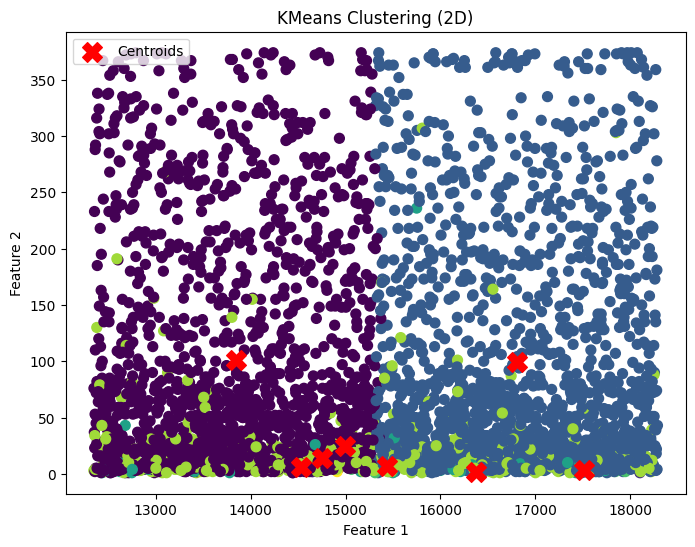

In [143]:


labels = cust_trained_model.labels_

plt.figure(figsize=(8,6))
plt.scatter(X_train.iloc[:,0], X_train.iloc[:, 1],
            c=labels, cmap='viridis', s=50)
plt.scatter(cust_model1.cluster_centers_[:, 0],
            cust_model1.cluster_centers_[:, 1],
            c='red', marker='X', s=200, label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Clustering (2D)')
plt.legend()
plt.show()


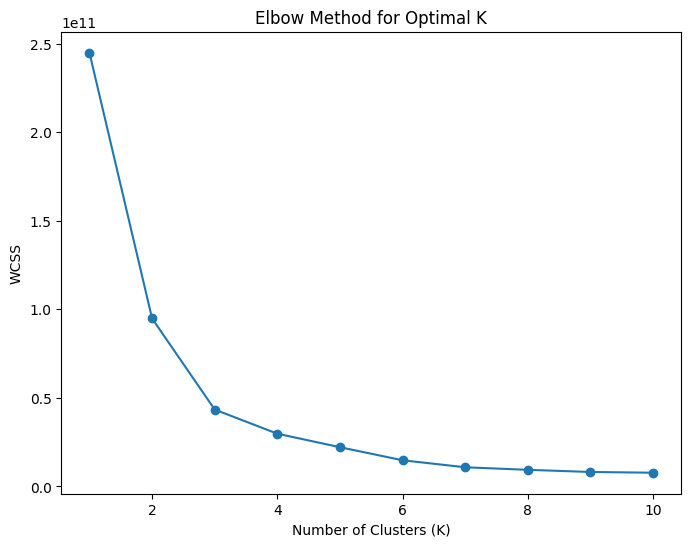

In [144]:
wcss = []
K_range = range(1, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=6)
    km.fit(X_train)
    wcss.append(km.inertia_)

plt.figure(figsize=(8,6))
plt.plot(K_range, wcss, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

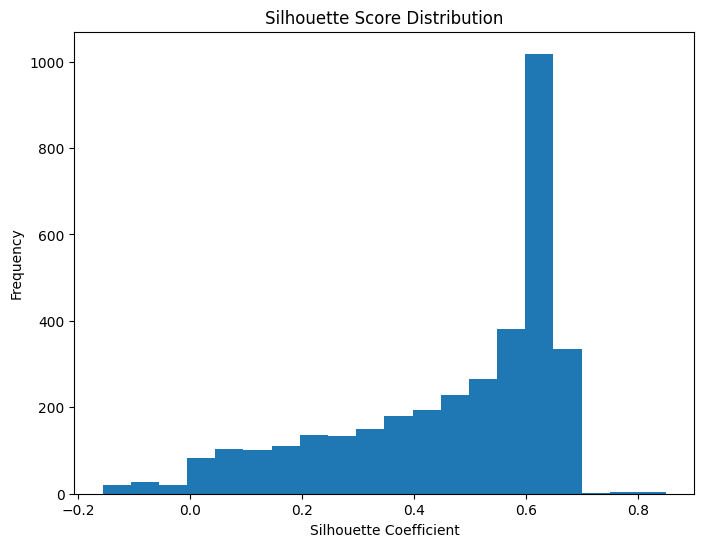

Average Silhouette Score: 0.4670768567259196


In [145]:
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np

silhouette_vals = silhouette_samples(X_train, labels)

plt.figure(figsize=(8,6))
plt.hist(silhouette_vals, bins=20)
plt.xlabel('Silhouette Coefficient')
plt.ylabel('Frequency')
plt.title('Silhouette Score Distribution')
plt.show()

print("Average Silhouette Score:", silhouette_score(X_train, labels))


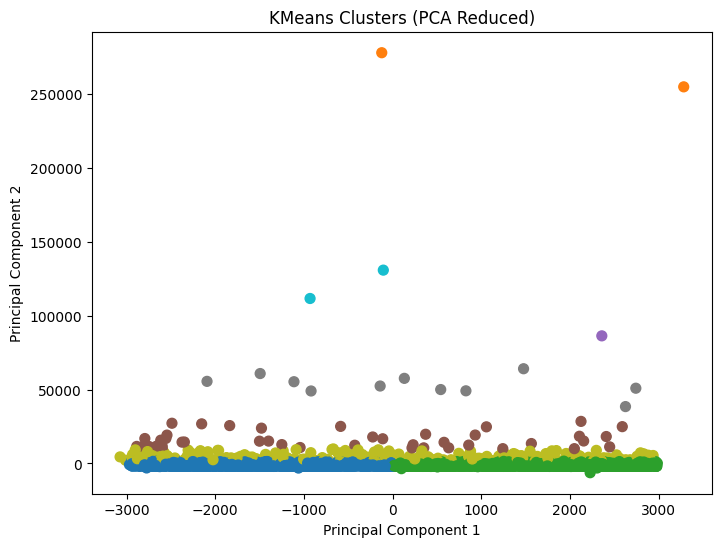

In [153]:

from sklearn.decomposition import PCA

pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_train)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 1], X_pca[:, 0],
            c=labels, cmap='tab10', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clusters (PCA Reduced)')
plt.show()


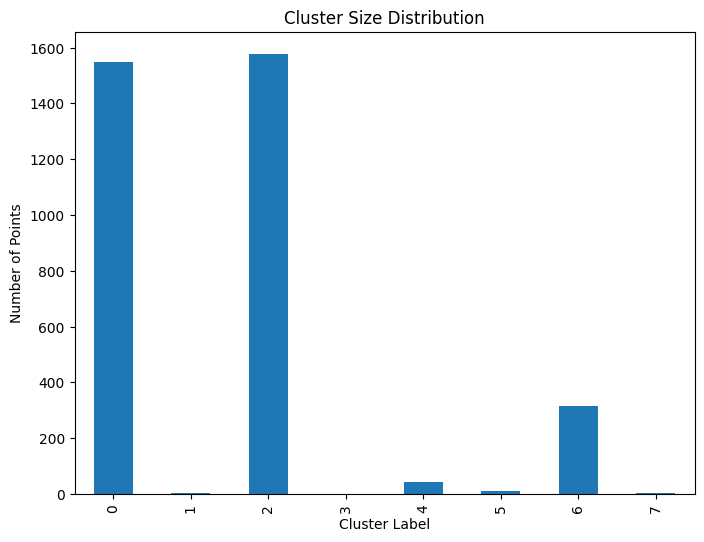

In [149]:


cluster_counts = pd.Series(labels).value_counts().sort_index()

plt.figure(figsize=(8,6))
cluster_counts.plot(kind='bar')
plt.xlabel('Cluster Label')
plt.ylabel('Number of Points')
plt.title('Cluster Size Distribution')
plt.show()


In [131]:
# check how many similar products did each customer buy
#data.groupby('CustomerID')['Description'].nunique()

In [132]:
#is stockcode and description have one to one relationship
# data.groupby('StockCode')['Description'].nunique()

In [133]:
# data[data['StockCode']=='10123G']

In [134]:
#fill in description for the stoockcode where descripption is not one to one
# data.loc[(data['StockCode']=='gift_0001_20') & (data['Description']), 'Description'] = 'Gift Card 20'

In [135]:
# data[data['StockCode']=='gift_0001_20bb

In [136]:
#change description of index 228807 to Dotcomgiftshop Gift Voucher £20.00
# data.loc[228807, 'Description'] = 'Dotcomgiftshop Gift Voucher £20.00'


In [137]:
 # correct_desc = (
#     data.groupby("StockCode")["Description"]
#     .agg(lambda x: x.mode().iat[0])
# )